World Population Data Analysis Process 
prepared by: Abraham Shiferaw 
id: 0704/12


In [6]:
#Data Analysis Process  
#In this project the data is gatherd from three different datasets in different formats which focuses on world population 

#Prepared BY: Abraham Shiferaw 
#Id:          0704/12 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_json = pd.read_csv('Area.csv', encoding='ISO-8859-1')

df_csv = pd.read_json('population-in-decade.json', encoding='ISO-8859-1')

df_excel = pd.read_excel('world_population.xlsx',)

df_combined = pd.concat([df_csv, df_json, df_excel], ignore_index=True)   #combined the three different format dataset 


print("Combined Dataset:")
# Assuming df_combined is your combined DataFrame
print(df_combined)

Combined Dataset:
     2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771.0       38972230.0       33753499.0       28189672.0   
1          2842321.0        2866849.0        2882481.0        2913399.0   
2         44903225.0       43451666.0       39543154.0       35856344.0   
3            44273.0          46189.0          51368.0          54849.0   
4            79824.0          77700.0          71746.0          71519.0   
..               ...              ...              ...              ...   
697              NaN              NaN              NaN              NaN   
698              NaN              NaN              NaN              NaN   
699              NaN              NaN              NaN              NaN   
700              NaN              NaN              NaN              NaN   
701              NaN              NaN              NaN              NaN   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0     

In [7]:
print(df_combined.head())  
print(df_combined.info())    

   2022 Population  2020 Population  2015 Population  2010 Population  \
0       41128771.0       38972230.0       33753499.0       28189672.0   
1        2842321.0        2866849.0        2882481.0        2913399.0   
2       44903225.0       43451666.0       39543154.0       35856344.0   
3          44273.0          46189.0          51368.0          54849.0   
4          79824.0          77700.0          71746.0          71519.0   

   2000 Population  1990 Population  1980 Population  1970 Population  \
0       19542982.0       10694796.0       12486631.0       10752971.0   
1        3182021.0        3295066.0        2941651.0        2324731.0   
2       30774621.0       25518074.0       18739378.0       13795915.0   
3          58230.0          47818.0          32886.0          27075.0   
4          66097.0          53569.0          35611.0          19860.0   

   Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  \
0         NaN                NaN          Na

In [8]:
#Data Cleaning 
# Check for missing values
print(df_combined.isnull().sum())

# Fill missing values with the mean of the column
df_combined['2022 Population'].fillna(df_combined['2022 Population'].mean(), inplace=True)


2022 Population                468
2020 Population                468
2015 Population                468
2010 Population                468
2000 Population                468
1990 Population                468
1980 Population                468
1970 Population                468
Area (km²)                     468
Density (per km²)              468
Growth Rate                    468
World Population Percentage    468
Rank                           468
CCA3                           468
Country/Territory              468
Capital                        468
Continent                      468
dtype: int64


In [9]:
# Feature Engineering 
# Calculate Population Growth Rate  
# Creating New Feature 
# Calculate Population Growth Rate  
df_combined['Population Growth Rate'] = (df_combined['2022 Population'] - df_combined['2020 Population']) / df_combined['2020 Population'] * 100


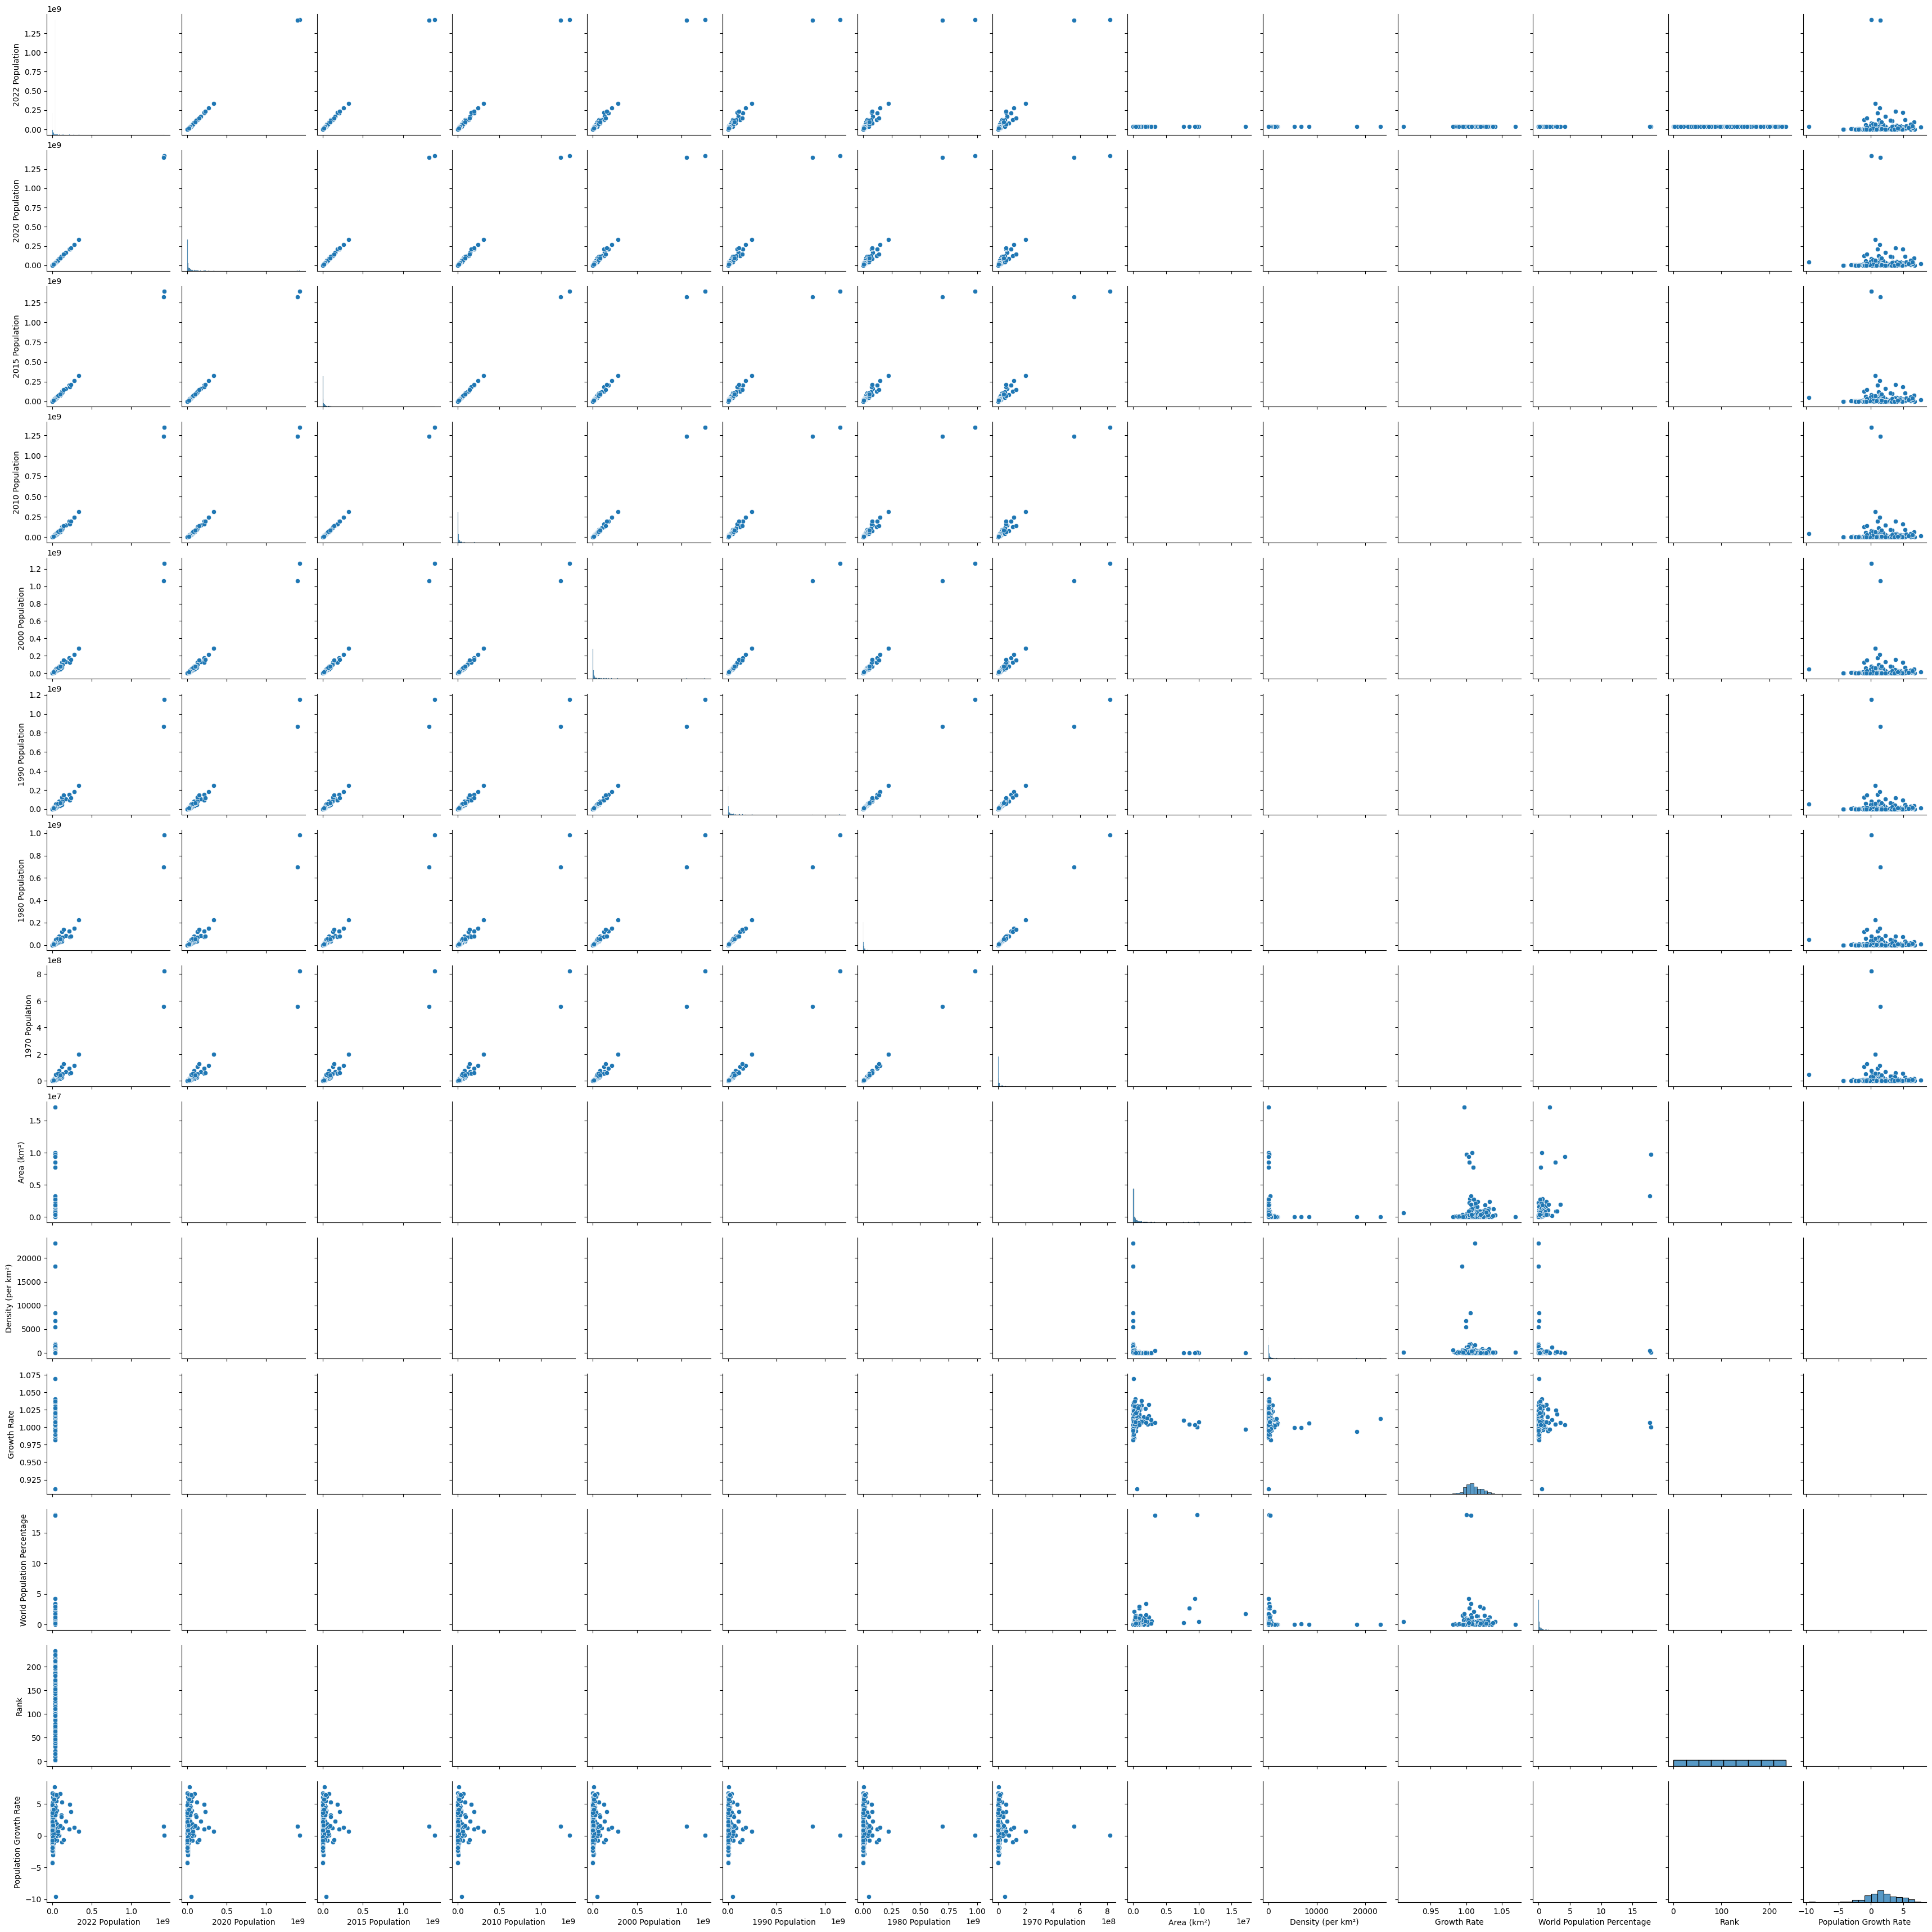

In [10]:
sns.pairplot(df_combined)  # Example pairplot using Seaborn
plt.show()

In [11]:
desc_stats = df_combined.describe()
print(desc_stats)

       2022 Population  2020 Population  2015 Population  2010 Population  \
count     7.020000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      3.407441e+07     3.350107e+07     3.172996e+07     2.984524e+07   
std       7.884941e+07     1.355899e+08     1.304050e+08     1.242185e+08   
min       5.100000e+02     5.200000e+02     5.640000e+02     5.960000e+02   
25%       2.261363e+07     4.152845e+05     4.046760e+05     3.931490e+05   
50%       3.407441e+07     5.493074e+06     5.307400e+06     4.942770e+06   
75%       3.407441e+07     2.144798e+07     1.973085e+07     1.915957e+07   
max       1.425887e+09     1.424930e+09     1.393715e+09     1.348191e+09   

       2000 Population  1990 Population  1980 Population  1970 Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.626947e+07     2.271022e+07     1.898462e+07     1.578691e+07   
std       1.116982e+08     9.783217e+07     8.178519e+07     6.779509e+07  

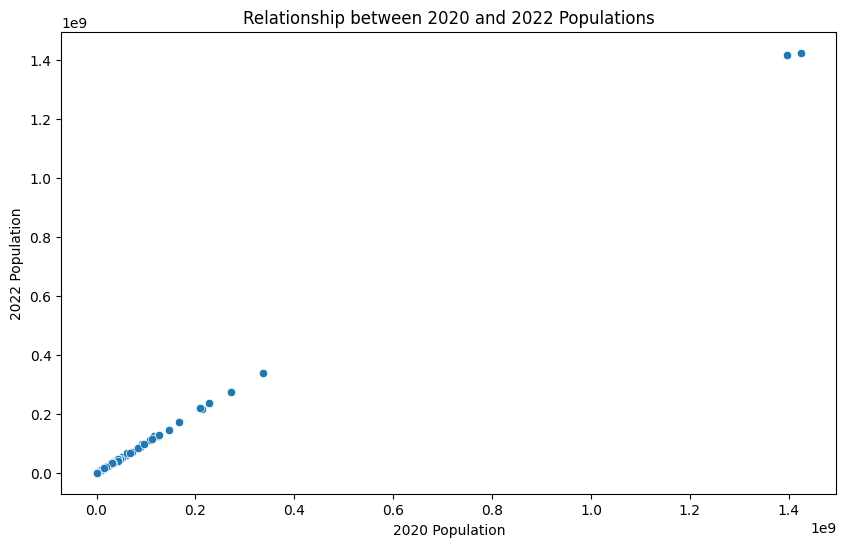

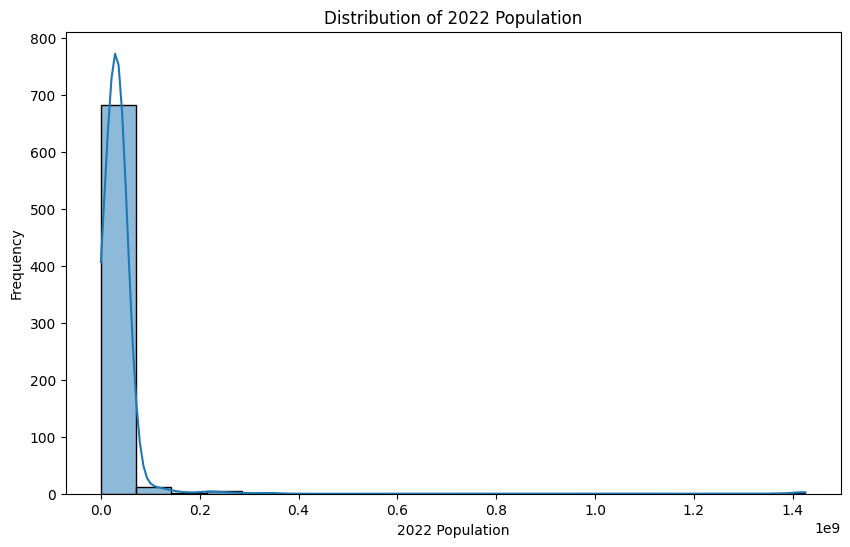

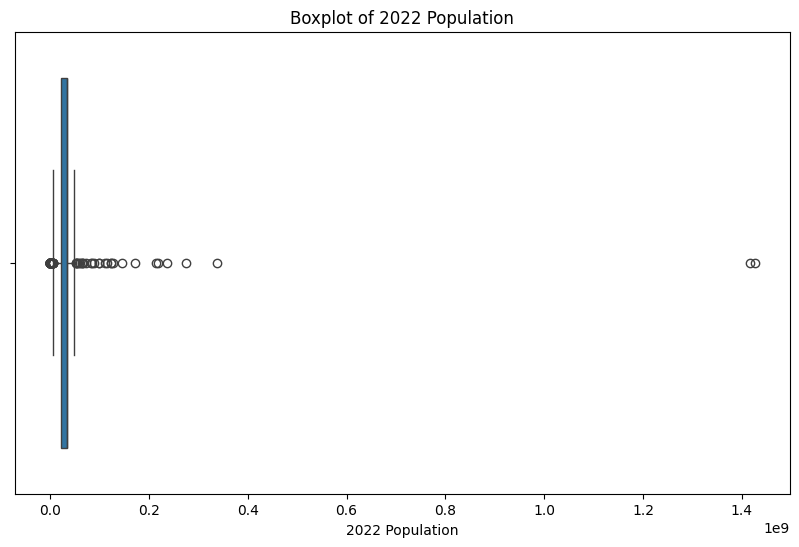

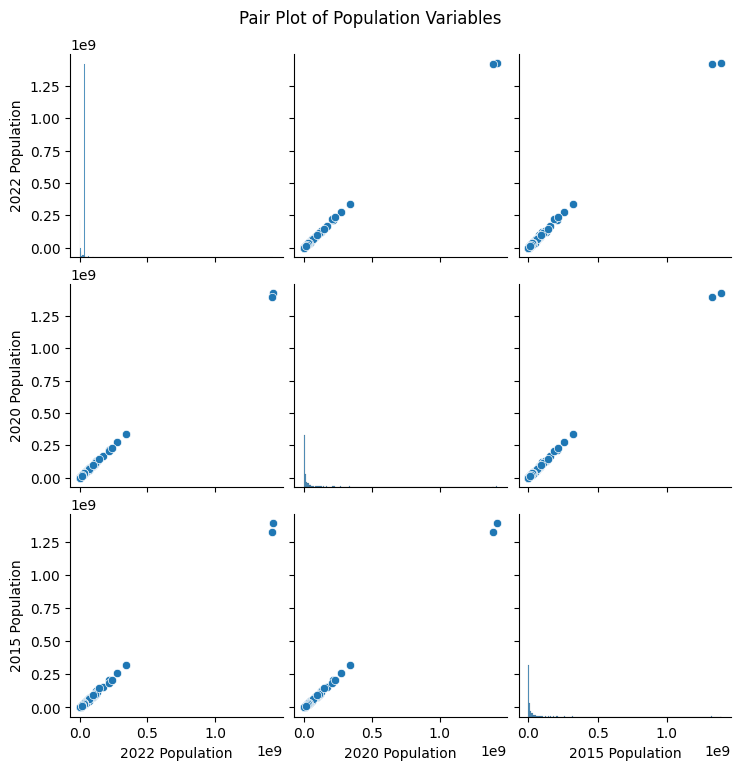

In [12]:
#Visualizing relationships, patterns, and build intuition 
# Assuming df_world_population our DataFrame with the world population data

# Scatter plot to explore the relationship between 2022 and 2020 populations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2020 Population', y='2022 Population', data=df_combined)
plt.title('Relationship between 2020 and 2022 Populations')
plt.xlabel('2020 Population')
plt.ylabel('2022 Population')
plt.show()

# Distribution of 2022 Population
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['2022 Population'], bins=20, kde=True)
plt.title('Distribution of 2022 Population')
plt.xlabel('2022 Population')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in 2022 Population
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['2022 Population'])
plt.title('Boxplot of 2022 Population')
plt.xlabel('2022 Population')
plt.show()

# Pair plot to explore relationships between multiple variables
sns.pairplot(df_combined[['2022 Population', '2020 Population', '2015 Population']])
plt.suptitle('Pair Plot of Population Variables', y=1.02)
plt.show()


In [13]:
#Draw conclusions with descriptive statistics using three different data formats 
# Display basic descriptive statistics for relevant columns
descriptive_stats = df_combined[['2022 Population', '2020 Population', '2015 Population']].describe()

# Calculate mean, median, and standard deviation for each subject
mean_population_2022 = df_combined['2022 Population'].mean()
median_population_2022 = df_combined['2022 Population'].median()
std_dev_population_2022 = df_combined['2022 Population'].std()

mean_population_2020 = df_combined['2020 Population'].mean()
median_population_2020 = df_combined['2020 Population'].median()
std_dev_population_2020 = df_combined['2020 Population'].std()

mean_population_2015 = df_combined['2015 Population'].mean()
median_population_2015 = df_combined['2015 Population'].median()
std_dev_population_2015 = df_combined['2015 Population'].std()

# Display the calculated statistics
print("Descriptive Statistics:")
print(descriptive_stats)
print("\n2022 Population Statistics:")
print(f"Mean: {mean_population_2022}, Median: {median_population_2022}, Standard Deviation: {std_dev_population_2022}")
print("\n2020 Population Statistics:")
print(f"Mean: {mean_population_2020}, Median: {median_population_2020}, Standard Deviation: {std_dev_population_2020}")
print("\n2015 Population Statistics:")
print(f"Mean: {mean_population_2015}, Median: {median_population_2015}, Standard Deviation: {std_dev_population_2015}")


Descriptive Statistics:
       2022 Population  2020 Population  2015 Population
count     7.020000e+02     2.340000e+02     2.340000e+02
mean      3.407441e+07     3.350107e+07     3.172996e+07
std       7.884941e+07     1.355899e+08     1.304050e+08
min       5.100000e+02     5.200000e+02     5.640000e+02
25%       2.261363e+07     4.152845e+05     4.046760e+05
50%       3.407441e+07     5.493074e+06     5.307400e+06
75%       3.407441e+07     2.144798e+07     1.973085e+07
max       1.425887e+09     1.424930e+09     1.393715e+09

2022 Population Statistics:
Mean: 34074414.70940172, Median: 34074414.70940171, Standard Deviation: 78849409.58978744

2020 Population Statistics:
Mean: 33501070.952991452, Median: 5493074.5, Standard Deviation: 135589876.9244388

2015 Population Statistics:
Mean: 31729956.243589744, Median: 5307400.0, Standard Deviation: 130404992.75175995


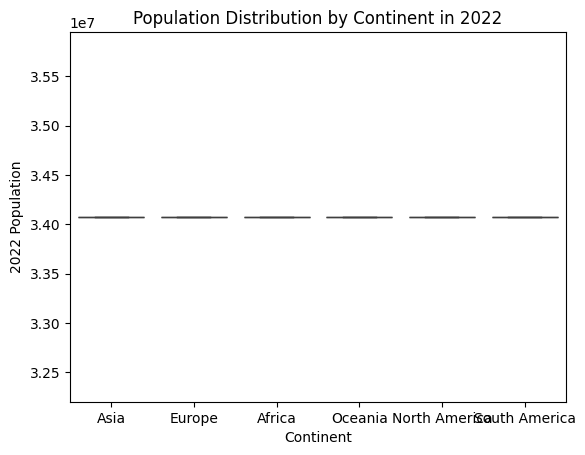

In [14]:
#Drawing conclutions Using visualization
# Example: Box plot for '2022 Population' by 'Continent'
sns.boxplot(x='Continent', y='2022 Population', data=df_combined)
plt.title('Population Distribution by Continent in 2022')
plt.show()

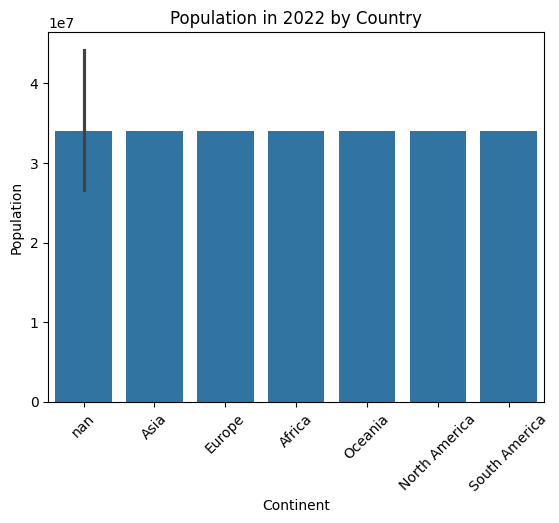

In [15]:
#Communicating the Result 
#the last part 
df_combined['Continent'] = df_combined['Continent'].astype(str)  #reading the country column 

# Create a bar plot using seaborn
sns.barplot(x='Continent', y='2022 Population', data=df_combined)


plt.title('Population in 2022 by Country')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.xticks(rotation=45)  

# Show the plot
plt.show()